In [1]:
# Exploratory data analysis

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename = r"C:\Users\Rahul Choubey\project\audio\fold1\2CVI_15_11_0_15_0_0_0.wav"

In [4]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is 0098-E992

 Directory of C:\Users\Rahul Choubey

17-09-2022  16:54    <DIR>          .
12-09-2022  12:11    <DIR>          ..
09-09-2022  11:36    <DIR>          .android
08-08-2022  22:36    <DIR>          .atom
13-05-2022  07:39    <DIR>          .cache
03-05-2022  09:22    <DIR>          .conda
24-04-2022  15:29                25 .condarc
24-04-2022  15:28    <DIR>          .continuum
13-05-2022  07:39    <DIR>          .eclipse
08-09-2022  18:05    <DIR>          .gradle
13-09-2022  10:46    <DIR>          .ipynb_checkpoints
27-04-2022  12:22    <DIR>          .ipython
19-04-2022  15:05    <DIR>          .jdks
27-04-2022  12:22    <DIR>          .jupyter
23-07-2022  12:48    <DIR>          .keras
09-09-2022  12:35    <DIR>          .m2
27-04-2022  12:23    <DIR>          .matplotlib
20-06-2022  13:03    <DIR>          .ms-ad
26-08-2022  12:43    <DIR>          .p2
28-07-2022  13:05    <DIR>          .Protege

In [5]:
import IPython.display as ipd
import librosa
import librosa.display


09-08-2022  15:30    <DIR>          .vscode
26-08-2022  12:37    <DIR>          anaconda3
13-07-2022  11:29             8,324 Android malware harshita vasa.ipynb
09-09-2022  11:07    <DIR>          AndroidStudioProjects
12-07-2022  11:08            11,746 Android_malware_Base.ipynb
19-04-2022  21:50    <DIR>          ansel
01-09-2022  15:33            45,949 cnn_implemention.ipynb
17-04-2022  21:23    <DIR>          Contacts
13-09-2022  12:45    <DIR>          Desktop
17-09-2022  22:12    <DIR>          Documents
17-09-2022  21:56    <DIR>          Downloads
18-04-2022  11:03    <DIR>          Dropbox
13-05-2022  07:37    <DIR>          eclipse
26-07-2022  18:18    <DIR>          eclipse-workspace
27-04-2022  12:26            20,371 face-dete.ipynb
17-04-2022  21:23    <DIR>          Favorites
12-08-2022  14:32         2,074,541 fetal_base.ipynb
28-06-2022  14:52            20,116 Heart Failure Base.ipynb
29-06-2022  14:19    <DIR>          IdeaProjects
13-05-2022  06:42            31

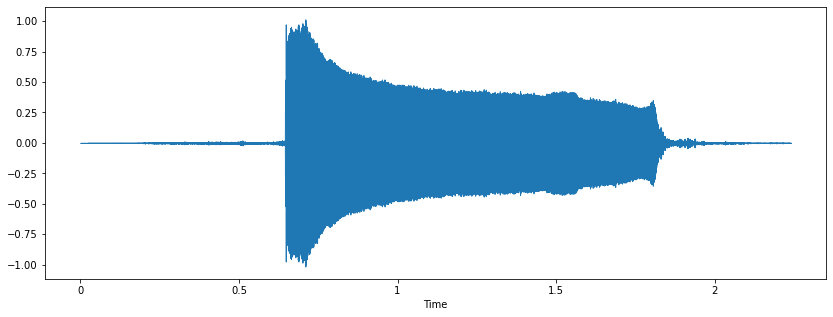

In [6]:
plt.figure(figsize = (14,5))
librosa_audio_data, librosa_sample_rate = librosa.load(filename)
librosa.display.waveshow(librosa_audio_data,sr = librosa_sample_rate)
ipd.Audio(filename)

In [7]:
librosa_sample_rate

22050

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio = wav.read(filename)

In [9]:
wave_sample_rate

16000

In [10]:
wave_audio

array([ 0,  0,  0, ..., 15, 15, 17], dtype=int16)

In [11]:
librosa_audio_data

array([0.        , 0.        , 0.        , ..., 0.0004491 , 0.00055851,
       0.00038443], dtype=float32)

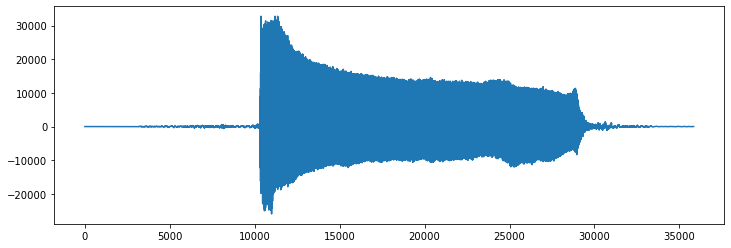

In [12]:
plt.figure(figsize = (12,4))
plt.plot(wave_audio)

In [13]:
mfccs = librosa.feature.mfcc(y = librosa_audio_data, sr = librosa_sample_rate , n_mfcc = 40)
print(mfccs.shape)

(40, 97)


In [14]:
mfccs

array([[-5.3737079e+02, -5.3737079e+02, -5.3737079e+02, ...,
        -5.2416016e+02, -5.2323993e+02, -5.2539032e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.8584246e+01,  1.9867950e+01,  1.6857410e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.8291752e+01,  1.9522587e+01,  1.6602705e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.2395754e-01,  1.5376407e+00,  7.0722681e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -3.7662372e-01,  1.5619119e+00,  9.0637732e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -5.2437758e-01,  1.5270846e+00,  1.0561175e+00]], dtype=float32)

In [18]:
import pandas as pd
import os
import librosa

audio_dataset_path = "project/audio"
metadata = pd.read_csv(r"C:\Users\Rahul Choubey\Documents\project_metadata.csv")

In [19]:
def feature_extractor(file):
    audio,sample_rate = librosa.load(file_name,res_type = "kaiser_fast")
    mfccs_features = librosa.feature.mfcc(y = audio,sr = sample_rate,n_mfcc = 40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis = 0)
    
    return mfccs_scaled_features

In [20]:
import numpy as np
from tqdm import tqdm

extracted_features = []
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),"fold"+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

826it [00:36, 22.37it/s]


In [21]:
extracted_features_df = pd.DataFrame(extracted_features,columns = ["feature","class"])
extracted_features_df.head(10)

,feature,class
0,"[-281.72916, 23.257269, -133.0803, 6.278464, -...",Emergency
1,"[-301.5869, 91.58809, -8.9796505, -0.8137942, ...",Emergency
2,"[-309.45685, 70.0061, 0.7612787, 1.1770009, -9...",Emergency
3,"[-165.89603, 17.578115, -53.605705, -1.5174259...",Emergency
4,"[-272.96402, 60.37545, -57.678917, -6.03928, -...",Emergency
5,"[-282.90524, 64.886055, -21.757944, 7.779908, ...",Emergency
6,"[-79.83133, 60.080547, 4.5111265, 26.124855, -...",Emergency
7,"[-126.912415, 73.795364, -0.91503006, 17.48359...",Emergency
8,"[-108.41625, 58.641205, -1.3929838, 22.9957, -...",Emergency
9,"[-162.60678, 62.435806, -3.4435353, 17.128069,...",Emergency


In [22]:
x = np.array(extracted_features_df["feature"].tolist())
y = np.array(extracted_features_df["class"].tolist())


In [23]:
x.shape

(826, 40)

In [24]:
y.shape

(826,)

In [25]:
# y = np.array(pd.get_dummies(y))
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))
# y = y.reshape(-1,1) 

In [26]:
y.shape

(826, 2)

In [27]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 25)

In [29]:
x_train.shape

(660, 40)

In [30]:
x_test.shape

(166, 40)

In [31]:
y_train.shape

(660, 2)

In [32]:
y_test.shape

(166, 2)

In [33]:
import tensorflow as tf

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [35]:
num_labels = y.shape[1]

In [36]:
### first layer
model = Sequential()
model.add(Dense(200,input_shape = (40,)))
model.add(Activation("relu"))
model.add(Dropout(0.5))

### second layer
model.add(Dense(200))
model.add(Activation("relu"))
model.add(Dropout(0.5))

### third layer
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dropout(0.5))

### final layer
model.add(Dense(num_labels))
model.add(Activation("softmax"))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               8200      
                                                                 
 activation (Activation)     (None, 200)               0         
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [38]:
model.compile(loss = 'categorical_crossentropy',metrics = ["accuracy"],optimizer = "adam")

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath = "saved_models/audio_classification.h5",
                              verbose = 1,save_best_only = True)

start = datetime.now()

model.fit(x_train,y_train, batch_size = num_batch_size, epochs = num_epochs,validation_data = (x_test,y_test),callbacks = [checkpointer])

duration = datetime.now() - start
print("Training completed in time: ",duration)

Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 14.6322 - accuracy: 0.5121
Epoch 1: val_loss improved from inf to 2.90097, saving model to saved_models\audio_classification.h5
21/21 [==============================] - 1s 26ms/step - loss: 14.6322 - accuracy: 0.5121 - val_loss: 2.9010 - val_accuracy: 0.5904
Epoch 2/100
19/21 [==========================>...] - ETA: 0s - loss: 9.2312 - accuracy: 0.5362 
Epoch 2: val_loss improved from 2.90097 to 0.71303, saving model to saved_models\audio_classification.h5
21/21 [==============================] - 0s 10ms/step - loss: 8.8515 - accuracy: 0.5455 - val_loss: 0.7130 - val_accuracy: 0.7108
Epoch 3/100
10/21 [=============>................] - ETA: 0s - loss: 5.9440 - accuracy: 0.5844
Epoch 3: val_loss improved from 0.71303 to 0.53845, saving model to saved_models\audio_classification.h5
21/21 [==============================] - 0s 10ms/step - loss: 5.3132 - accuracy: 0.5636 - val_loss: 0.5384 - val_accuracy: 0.7530
Epoch 4/100

Epoch 58/100
14/21 [===================>..........] - ETA: 0s - loss: 0.4258 - accuracy: 0.8013
Epoch 58: val_loss improved from 0.39000 to 0.38508, saving model to saved_models\audio_classification.h5
21/21 [==============================] - 0s 8ms/step - loss: 0.4520 - accuracy: 0.8015 - val_loss: 0.3851 - val_accuracy: 0.8012
Epoch 59/100
13/21 [=================>............] - ETA: 0s - loss: 0.4435 - accuracy: 0.7668
Epoch 59: val_loss did not improve from 0.38508
21/21 [==============================] - 0s 7ms/step - loss: 0.4347 - accuracy: 0.7879 - val_loss: 0.4041 - val_accuracy: 0.8012
Epoch 60/100
11/21 [==============>...............] - ETA: 0s - loss: 0.4727 - accuracy: 0.7898
Epoch 60: val_loss did not improve from 0.38508
21/21 [==============================] - 0s 7ms/step - loss: 0.4579 - accuracy: 0.7955 - val_loss: 0.3917 - val_accuracy: 0.7892
Epoch 61/100
13/21 [=================>............] - ETA: 0s - loss: 0.3938 - accuracy: 0.7764
Epoch 61: val_loss did not 

21/21 [==============================] - 0s 6ms/step - loss: 0.3437 - accuracy: 0.8439 - val_loss: 0.3520 - val_accuracy: 0.8313
Epoch 87/100
12/21 [================>.............] - ETA: 0s - loss: 0.3413 - accuracy: 0.8542
Epoch 87: val_loss did not improve from 0.34749
21/21 [==============================] - 0s 7ms/step - loss: 0.3502 - accuracy: 0.8470 - val_loss: 0.3602 - val_accuracy: 0.8253
Epoch 88/100
12/21 [================>.............] - ETA: 0s - loss: 0.3124 - accuracy: 0.8594
Epoch 88: val_loss did not improve from 0.34749
21/21 [==============================] - 0s 7ms/step - loss: 0.3479 - accuracy: 0.8348 - val_loss: 0.3564 - val_accuracy: 0.8193
Epoch 89/100
12/21 [================>.............] - ETA: 0s - loss: 0.3355 - accuracy: 0.8646
Epoch 89: val_loss did not improve from 0.34749
21/21 [==============================] - 0s 6ms/step - loss: 0.3470 - accuracy: 0.8652 - val_loss: 0.3726 - val_accuracy: 0.8373
Epoch 90/100
11/21 [==============>...............] 

In [40]:
test_accuracy = model.evaluate(x_test,y_test,verbose = 0)
print(test_accuracy[1])


0.8313252925872803


In [41]:
filename = r"C:\Users\Rahul Choubey\project\audio\fold1\2CVI_15_11_0_15_0_0_0.wav"
prediction_feature = feature_extractor(filename)
prediction_feature = prediction_feature.reshape(1,-1)
# model.predict_classes(prediction_feature)
predictions = (model.predict(prediction_feature) > 0.5).astype("int32")


In [42]:
prediction_feature.shape

(1, 40)

In [43]:
x_test[1]

array([-3.96273438e+02,  1.35678085e+02, -8.87105179e+00, -1.31443491e+01,
       -3.03524613e+00, -9.20888007e-01, -9.90265751e+00,  4.11157370e+00,
       -3.45680378e-02, -2.76059508e+00,  3.53937483e+00,  5.03969908e+00,
        8.68413353e+00,  1.26352654e+01,  1.20248973e+00,  5.19995749e-01,
        2.37442183e+00,  8.39730644e+00,  1.67275083e+00, -7.17254257e+00,
       -2.43528509e+00,  1.59860241e+00,  4.82548285e+00,  8.36232185e+00,
        3.71345305e+00,  1.06405444e-01, -9.77238655e-01,  3.11134309e-02,
       -2.76709747e+00, -3.47207761e+00,  1.95038295e+00,  3.71639466e+00,
        4.09950829e+00,  3.32178521e+00,  4.86096191e+00,  1.85095692e+00,
       -4.40174155e-02, -1.72012842e+00,  6.98764801e-01,  1.07319438e+00],
      dtype=float32)

In [44]:
# prediction = (model.predict(x_test) > 0.5).astype("int32")
# model.predict_classes(x_test)
prediction=model.predict(x_test)
prediction=np.argmax(prediction,axis=1)

In [45]:
filename = r"C:\Users\Rahul Choubey\project\audio\fold1\2CVI_15_11_0_15_0_0_0.wav"
audio,sample_rate = librosa.load(filename,res_type = "kaiser_fast")
mfccs_features = librosa.feature.mfcc(y = audio,sr = sample_rate,n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_label,axis = 1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class


[-3.7120700e+02  2.7957581e+01 -7.3138351e+01  5.5408440e+00
  5.5431752e+00  2.9883022e+01  7.7791080e+00  1.2462693e+01
  1.2902954e+00 -4.3729458e+00  1.1319088e+01  1.0936631e+01
  1.5821096e+01 -4.4865885e+00 -6.6243367e+00  1.3589262e+00
  1.5920758e-01  5.5626292e+00  1.0948885e+01 -1.0915886e+01
 -1.1235410e+01  7.7304711e+00  5.7797337e+00  6.4825029e+00
 -1.3672189e+00 -3.4633954e+00 -4.0238390e+00 -3.3110936e+00
  4.0273557e+00  7.7600317e+00 -6.7120395e+00 -1.1104970e+01
  3.8478229e+00  6.5614414e-01  2.1946762e+00  9.0929049e-01
 -1.4526279e-01 -6.5455580e+00 -4.7872081e+00  9.5815067e+00]
[[-3.7120700e+02  2.7957581e+01 -7.3138351e+01  5.5408440e+00
   5.5431752e+00  2.9883022e+01  7.7791080e+00  1.2462693e+01
   1.2902954e+00 -4.3729458e+00  1.1319088e+01  1.0936631e+01
   1.5821096e+01 -4.4865885e+00 -6.6243367e+00  1.3589262e+00
   1.5920758e-01  5.5626292e+00  1.0948885e+01 -1.0915886e+01
  -1.1235410e+01  7.7304711e+00  5.7797337e+00  6.4825029e+00
  -1.3672189e+00 

array(['Emergency'], dtype='<U13')

In [46]:
filename = r"C:\Users\Rahul Choubey\project\audio\fold2\87LX_12_7_0_19_0_0_0.wav"
audio,sample_rate = librosa.load(filename,res_type = "kaiser_fast")
mfccs_features = librosa.feature.mfcc(y = audio,sr = sample_rate,n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_label,axis = 1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-3.5189487e+02  6.7520149e+01 -4.9579365e+01  6.0856681e+00
 -1.6321520e+01  1.9764795e+01 -7.7380867e+00 -1.4442012e+01
 -7.8415985e+00 -7.3364697e+00  6.3761646e-01  8.8201447e+00
  1.2181327e+01  3.6291244e+00  1.4075946e+01 -6.5728459e+00
 -4.1754389e+00  4.1386208e-01 -2.0209317e+00  3.4493470e-01
 -5.8669267e+00  1.9137340e+00 -5.3728042e+00 -6.9742757e-01
  3.0564308e-02 -8.7640673e-01  4.3214753e-01 -4.8191266e+00
 -2.3888471e+00 -4.2002087e+00 -3.3368092e+00 -5.2460313e+00
 -1.8848791e+00 -2.3719594e+00 -3.8496466e+00 -1.6410595e+00
 -1.5216192e+00 -1.3575848e+00 -4.3069491e+00 -1.9398521e+00]
[[-3.5189487e+02  6.7520149e+01 -4.9579365e+01  6.0856681e+00
  -1.6321520e+01  1.9764795e+01 -7.7380867e+00 -1.4442012e+01
  -7.8415985e+00 -7.3364697e+00  6.3761646e-01  8.8201447e+00
   1.2181327e+01  3.6291244e+00  1.4075946e+01 -6.5728459e+00
  -4.1754389e+00  4.1386208e-01 -2.0209317e+00  3.4493470e-01
  -5.8669267e+00  1.9137340e+00 -5.3728042e+00 -6.9742757e-01
   3.0564308e-02 

array(['Non Emergency'], dtype='<U13')

In [47]:
filename = r"C:\Users\Rahul Choubey\Downloads\WhatsApp Audio 2022-09-14 at 11.04.34 AM.wav"
audio,sample_rate = librosa.load(filename,res_type = "kaiser_fast")
mfccs_features = librosa.feature.mfcc(y = audio,sr = sample_rate,n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_label,axis = 1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class


[-2.1561523e+02  1.4498347e+02  3.7220614e+00  4.0456619e+01
  6.9522486e+00 -4.9504800e+00 -1.8688919e+01 -3.4917457e+00
 -1.8869366e+01  4.9390311e+00 -8.9214814e-01  3.5392325e+00
 -6.5145630e-01 -2.1858885e+00 -6.5679274e+00  4.9863625e+00
 -8.2017069e+00 -1.3986828e+00 -5.6084876e+00 -3.2647243e+00
 -3.0344536e+00  1.7639569e+00 -4.9309816e+00 -4.3756146e+00
 -2.4408126e+00 -5.5883245e+00 -3.9569445e+00 -3.6370993e+00
 -2.5345609e+00 -1.6796622e+00  2.2947092e-01 -2.0648539e+00
  1.4725555e-01 -1.6436940e-01  1.1808617e+00 -1.1018597e+00
 -2.7157235e+00 -3.6509302e+00 -2.4022965e+00 -3.3437743e+00]
[[-2.1561523e+02  1.4498347e+02  3.7220614e+00  4.0456619e+01
   6.9522486e+00 -4.9504800e+00 -1.8688919e+01 -3.4917457e+00
  -1.8869366e+01  4.9390311e+00 -8.9214814e-01  3.5392325e+00
  -6.5145630e-01 -2.1858885e+00 -6.5679274e+00  4.9863625e+00
  -8.2017069e+00 -1.3986828e+00 -5.6084876e+00 -3.2647243e+00
  -3.0344536e+00  1.7639569e+00 -4.9309816e+00 -4.3756146e+00
  -2.4408126e+00 

array(['Non Emergency'], dtype='<U13')

In [48]:
filename = r"C:\Users\Rahul Choubey\Downloads\WhatsApp Audio 2022-09-14 at 11.04.34 AM.wav"
audio,sample_rate = librosa.load(filename,res_type = "kaiser_fast")
mfccs_features = librosa.feature.mfcc(y = audio,sr = sample_rate,n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_label,axis = 1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class


[-2.1561523e+02  1.4498347e+02  3.7220614e+00  4.0456619e+01
  6.9522486e+00 -4.9504800e+00 -1.8688919e+01 -3.4917457e+00
 -1.8869366e+01  4.9390311e+00 -8.9214814e-01  3.5392325e+00
 -6.5145630e-01 -2.1858885e+00 -6.5679274e+00  4.9863625e+00
 -8.2017069e+00 -1.3986828e+00 -5.6084876e+00 -3.2647243e+00
 -3.0344536e+00  1.7639569e+00 -4.9309816e+00 -4.3756146e+00
 -2.4408126e+00 -5.5883245e+00 -3.9569445e+00 -3.6370993e+00
 -2.5345609e+00 -1.6796622e+00  2.2947092e-01 -2.0648539e+00
  1.4725555e-01 -1.6436940e-01  1.1808617e+00 -1.1018597e+00
 -2.7157235e+00 -3.6509302e+00 -2.4022965e+00 -3.3437743e+00]
[[-2.1561523e+02  1.4498347e+02  3.7220614e+00  4.0456619e+01
   6.9522486e+00 -4.9504800e+00 -1.8688919e+01 -3.4917457e+00
  -1.8869366e+01  4.9390311e+00 -8.9214814e-01  3.5392325e+00
  -6.5145630e-01 -2.1858885e+00 -6.5679274e+00  4.9863625e+00
  -8.2017069e+00 -1.3986828e+00 -5.6084876e+00 -3.2647243e+00
  -3.0344536e+00  1.7639569e+00 -4.9309816e+00 -4.3756146e+00
  -2.4408126e+00 

array(['Non Emergency'], dtype='<U13')

In [49]:
filename = r"C:\Users\Rahul Choubey\Downloads\WhatsApp Audio 2022-09-14 at 11.36.42 AM.wav"
audio,sample_rate = librosa.load(filename,res_type = "kaiser_fast")
mfccs_features = librosa.feature.mfcc(y = audio,sr = sample_rate,n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_label,axis = 1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-1.00324219e+02  1.48379593e+02 -3.30997581e+01  2.84487057e+01
 -1.44665985e+01 -3.55495977e+00 -2.45272369e+01 -4.90626335e+00
 -1.36130457e+01  5.90379477e+00 -1.55491562e+01  7.99074793e+00
 -1.15445795e+01 -1.62334824e+00 -6.88673973e+00  2.66345334e+00
 -1.22001143e+01  2.08109236e+00 -8.56848812e+00 -3.96706200e+00
 -8.69616032e+00 -3.88638139e-01 -6.38060665e+00 -6.33452654e-01
 -4.02057028e+00 -6.31690204e-01 -3.40766883e+00  5.29514790e-01
  7.29919448e-02  2.12573481e+00  1.34870338e+00 -3.40891480e-01
 -2.54143238e-01  1.17205203e+00 -2.15498403e-01 -2.20852828e+00
 -8.12858999e-01 -4.57632452e-01 -5.33567011e-01 -2.22937465e+00]
[[-1.00324219e+02  1.48379593e+02 -3.30997581e+01  2.84487057e+01
  -1.44665985e+01 -3.55495977e+00 -2.45272369e+01 -4.90626335e+00
  -1.36130457e+01  5.90379477e+00 -1.55491562e+01  7.99074793e+00
  -1.15445795e+01 -1.62334824e+00 -6.88673973e+00  2.66345334e+00
  -1.22001143e+01  2.08109236e+00 -8.56848812e+00 -3.96706200e+00
  -8.69616032e+00 -

array(['Non Emergency'], dtype='<U13')

In [50]:
import pickle


In [51]:
pickle.dump(model, open('model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://ab7bb7cb-323d-441d-ba95-85154a2e5141/assets
